https://github.com/Ben-ekp/data_mid_bootcamp_project_regression

https://miro.com/app/board/o9J_lW_Ir_w=/

In [2]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Loading the Data:

In [3]:
df = pd.read_excel('regression_data.xls')
df.head(1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900


# Understanding the Data

In [4]:
df.shape

(21597, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


# Handling Missing Data:

In [7]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

To do: Look at non spaces in colums. 

# EDA

## Checking outliers

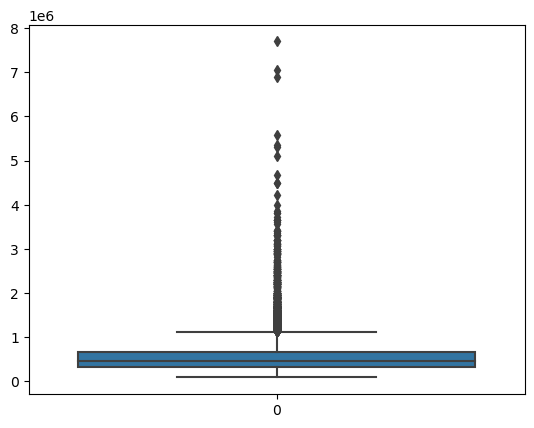

In [8]:
# best plot to check for outliers
sns.boxplot(df['price'])
plt.show()

Insgh: We can see that the majority of the house price is around 0.3K to 1.7M 

## Checking Distributions

In [9]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(np.object)
numericals.shape, categoricals.shape

((21597, 20), (21597, 0))

Insgh: We just have Numericlas Distributions

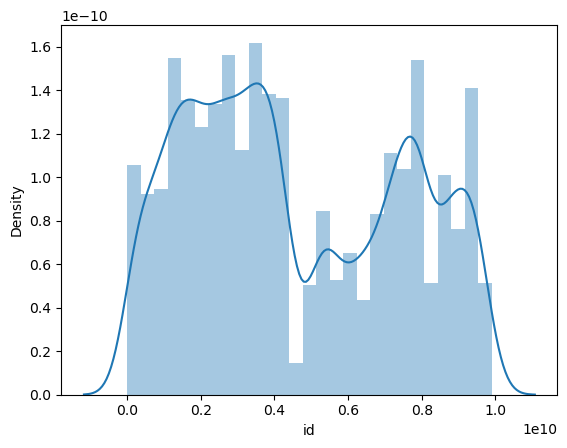

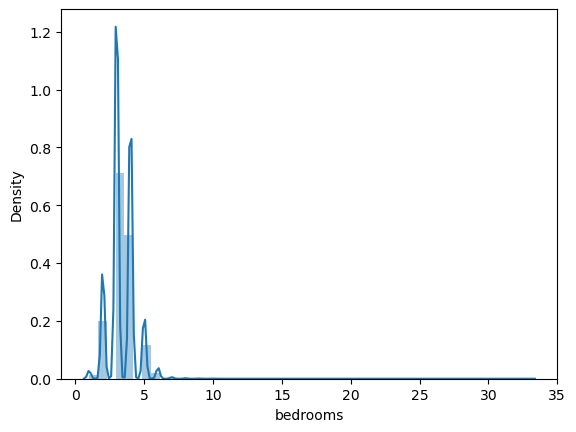

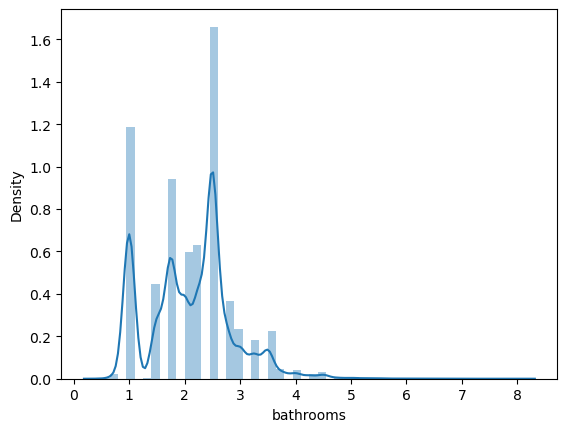

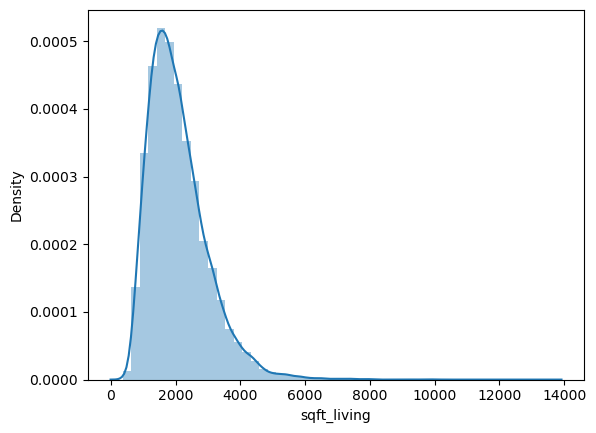

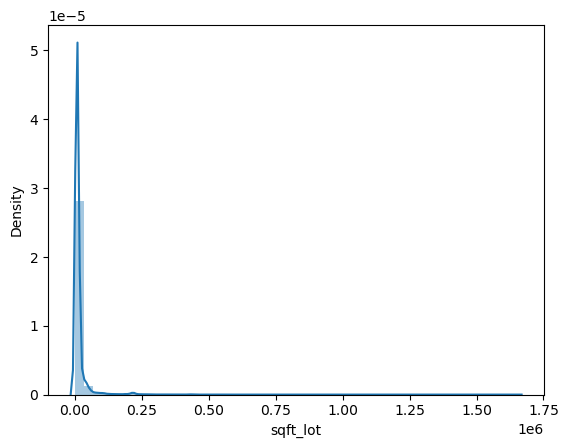

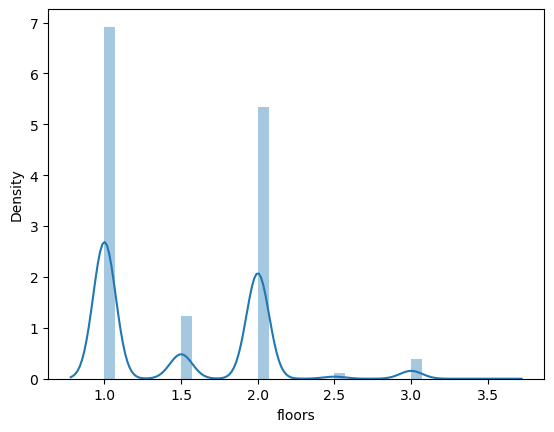

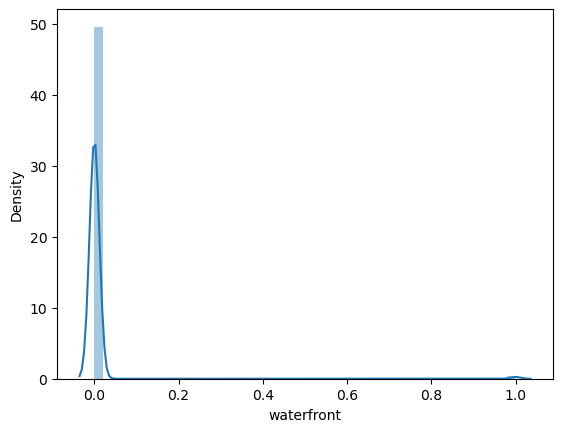

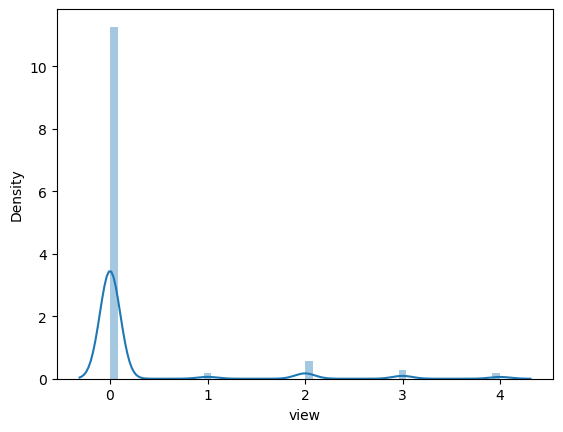

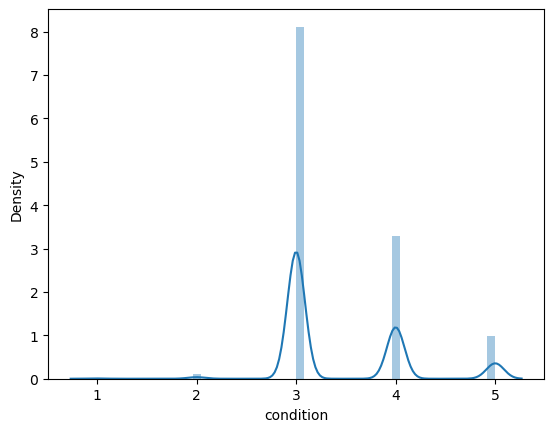

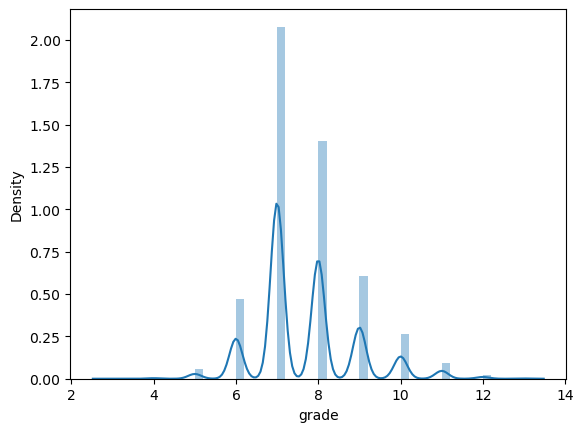

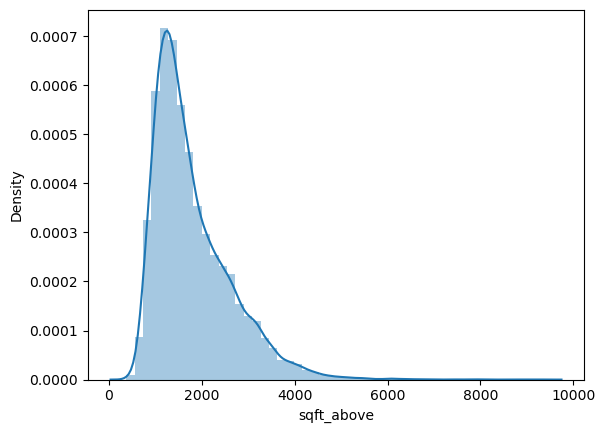

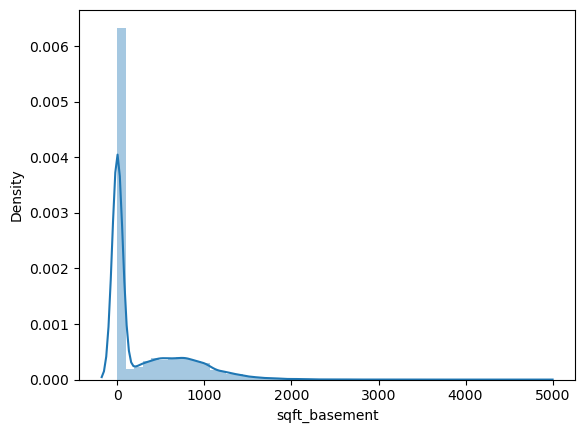

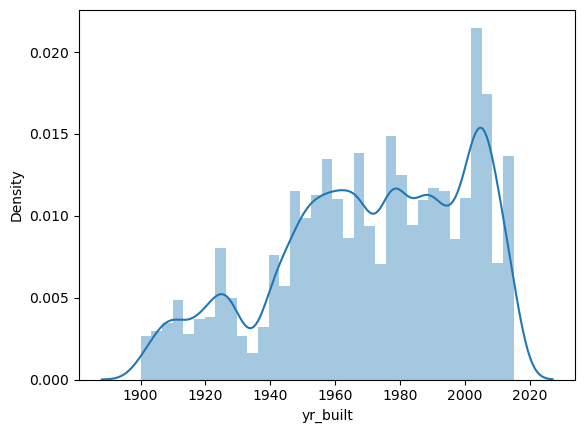

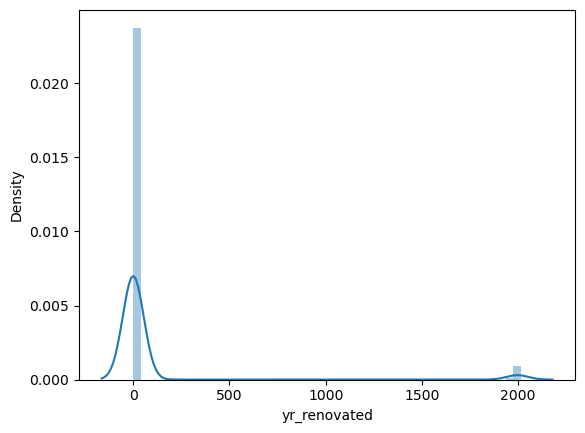

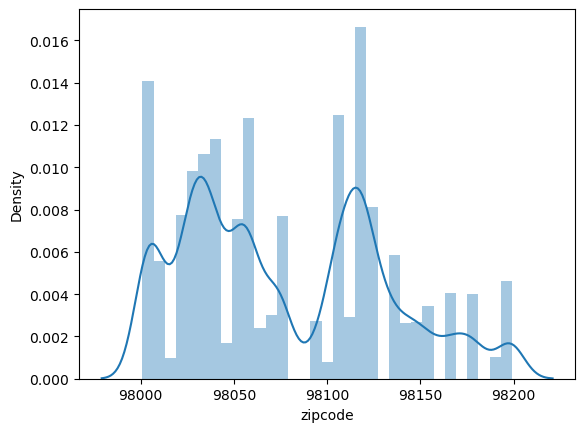

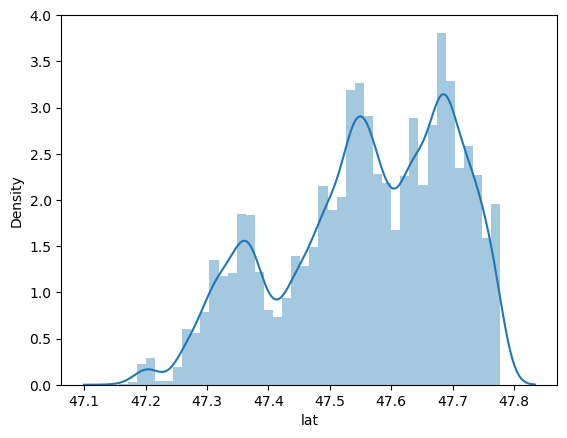

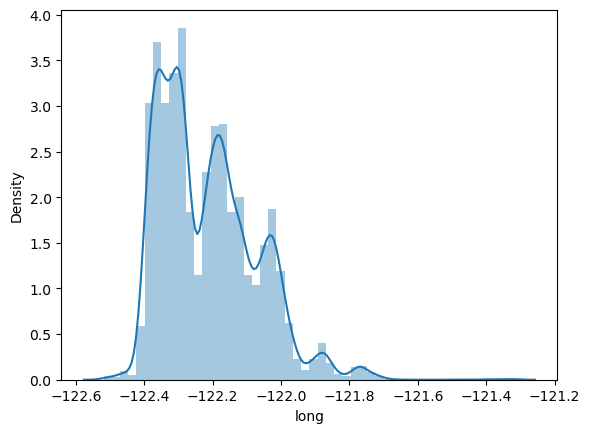

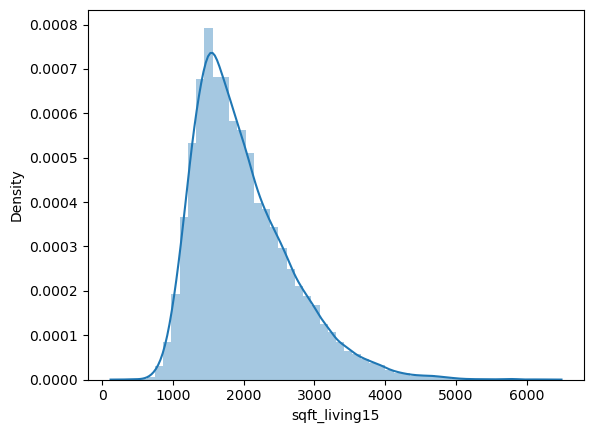

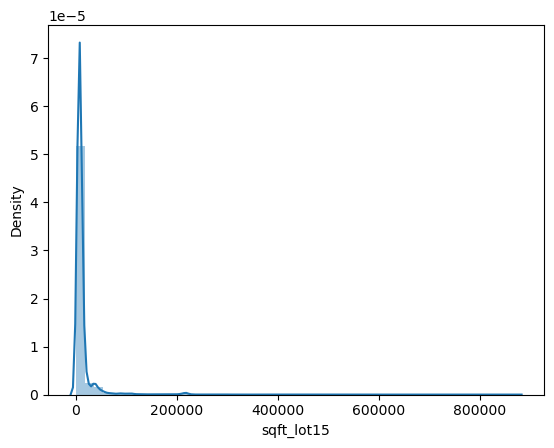

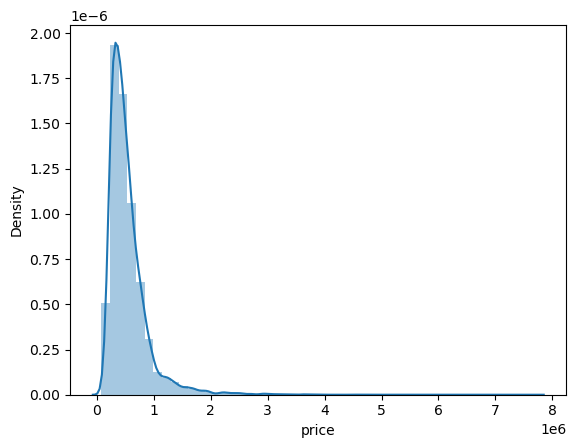

In [10]:
for col in numericals.columns:
  sns.distplot(df[col])
  plt.show()

# Zip Code Changes 

In [11]:
df['zipcode'] = df['zipcode'].astype('category')
print(df['zipcode'].dtypes)

category


# Checking Relationships - Regression

id   -0.016772
dtype: float64


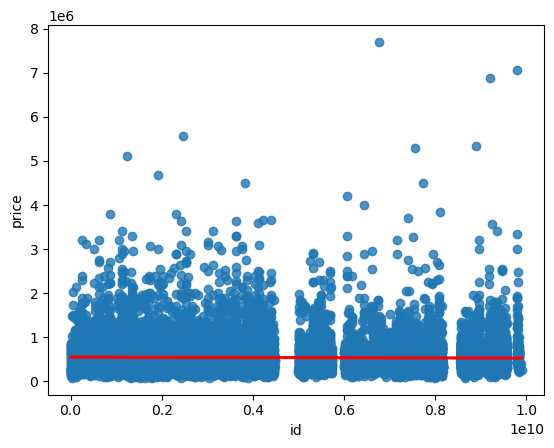

bedrooms    0.308787
dtype: float64


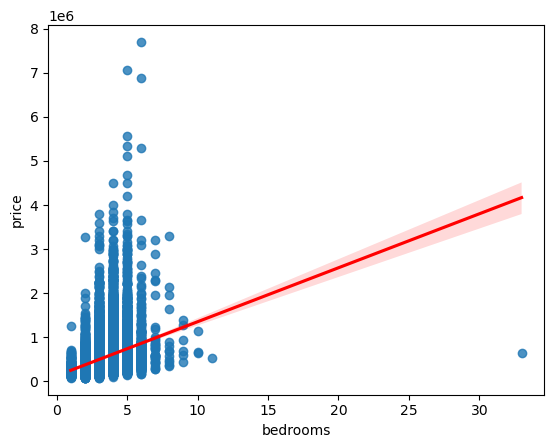

bathrooms    0.525906
dtype: float64


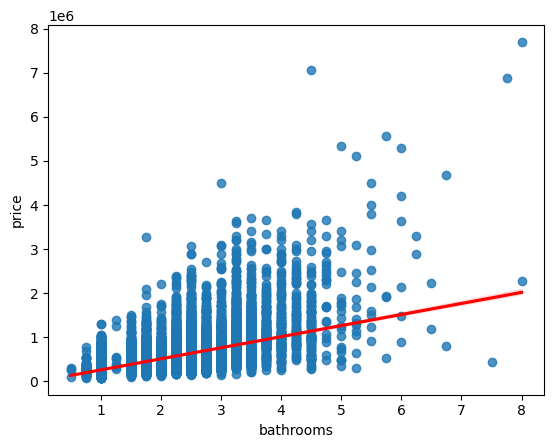

sqft_living    0.701917
dtype: float64


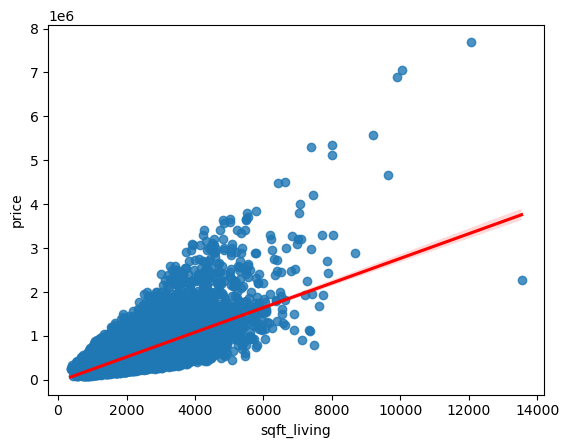

sqft_lot    0.089876
dtype: float64


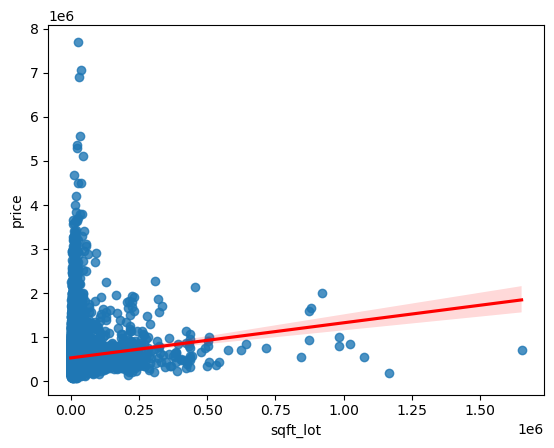

floors    0.256804
dtype: float64


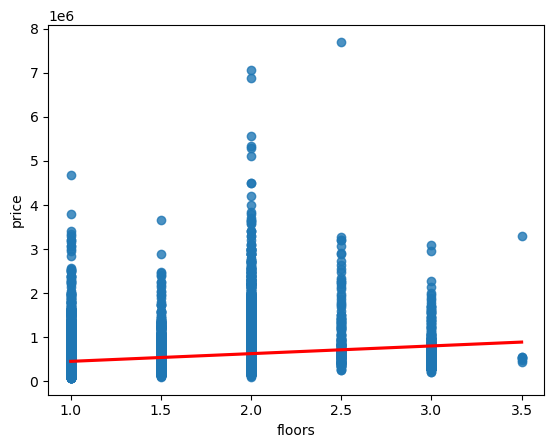

waterfront    0.266398
dtype: float64


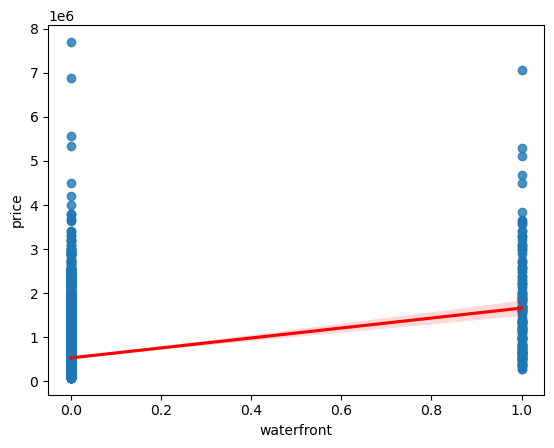

view    0.39737
dtype: float64


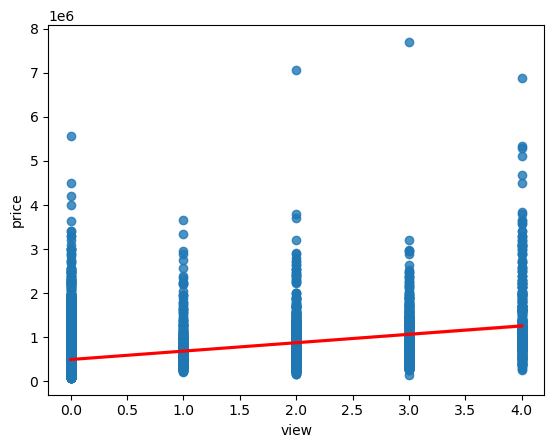

condition    0.036056
dtype: float64


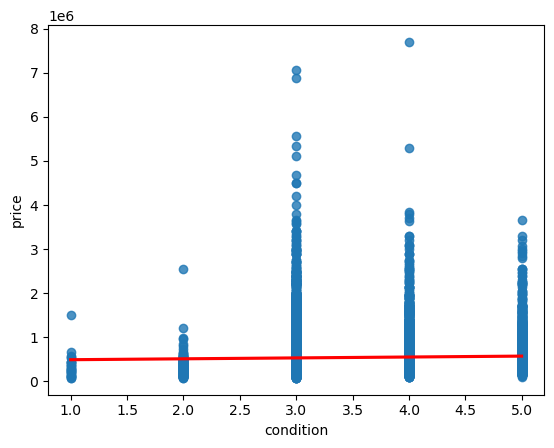

grade    0.667951
dtype: float64


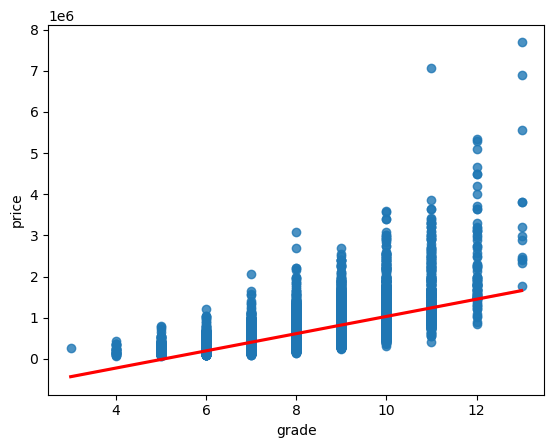

sqft_above    0.605368
dtype: float64


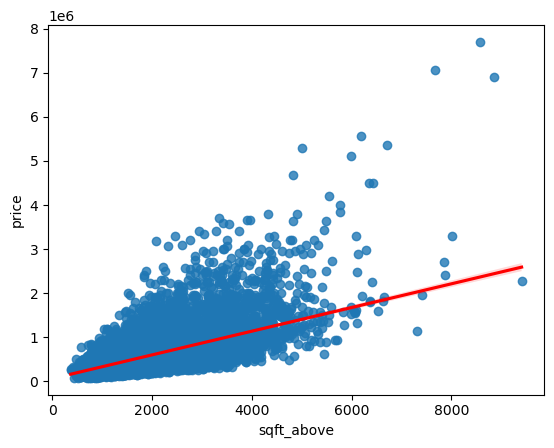

sqft_basement    0.323799
dtype: float64


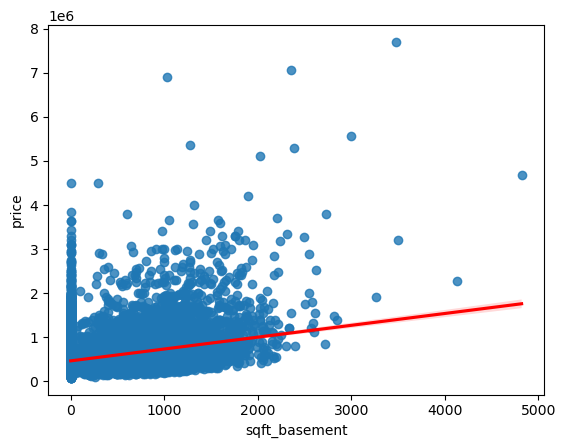

yr_built    0.053953
dtype: float64


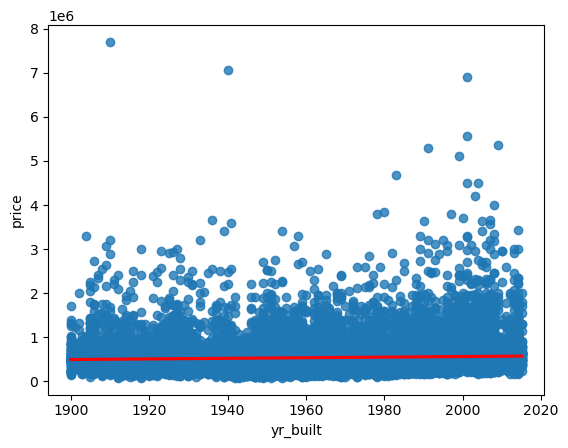

yr_renovated    0.126424
dtype: float64


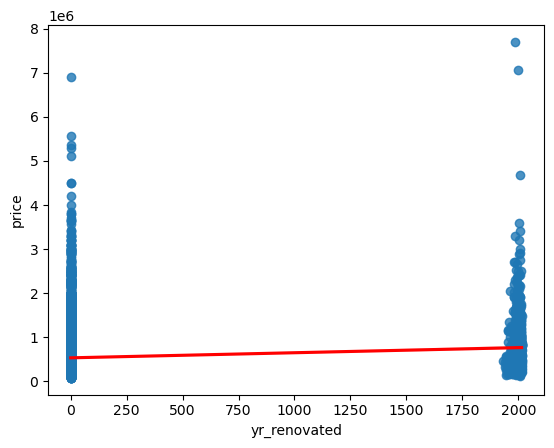

Series([], dtype: float64)


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [12]:
# Numericals:
for col in numericals.columns:
  print(df[[col]].corrwith(df["price"]))
  sns.regplot(x=df[col], y=df["price"], line_kws={"color": "red"})
  plt.show()

Dummify

In [13]:
df_dummies = pd.get_dummies(df['zipcode'], prefix='zip')

df = pd.concat([df, df_dummies], axis=1)

In [14]:
df.head(1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,3,1.0,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0


# Getting a benchmark model


In [15]:
df = df.drop(columns=['date'])
df.head(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0


In [16]:
X = pd.get_dummies(df.drop(['id', 'price'], axis=1))
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.794330667594175
MAE: 97350.31143075912
RMSE: 163650.528258523


In [17]:
print(df.dtypes)

id               int64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
                ...   
zip_98177        uint8
zip_98178        uint8
zip_98188        uint8
zip_98198        uint8
zip_98199        uint8
Length: 90, dtype: object


In [20]:
df.head(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# Getting a benchmark model
X = pd.get_dummies(df.drop(['id', 'price'], axis=1))
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.794330667594175
MAE: 97350.31143075912
RMSE: 163650.528258523


<Axes: xlabel='price'>

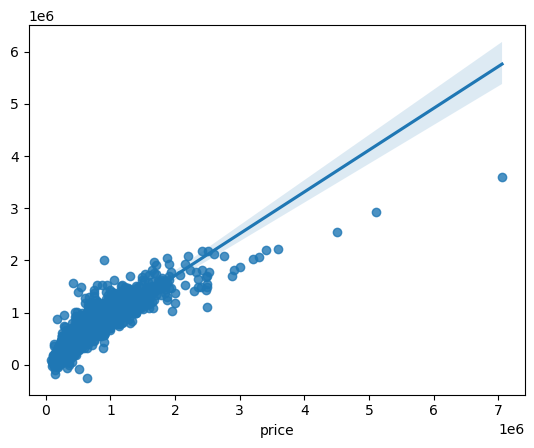

In [136]:
sns.regplot(x=y_test, y=lr.predict(X_test))

Comment: We want to do our ML without the outliers to see if we can improve our Benchmarck.

In [23]:
# R2 without the the outliers:

no_outliers = df[df["price"] < 1700000]
X = pd.get_dummies(no_outliers.drop(['id', 'price'], axis=1))
y = no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.8339128676827834
MAE: 75737.83188469328
RMSE: 107972.59594833644


<Axes: xlabel='price'>

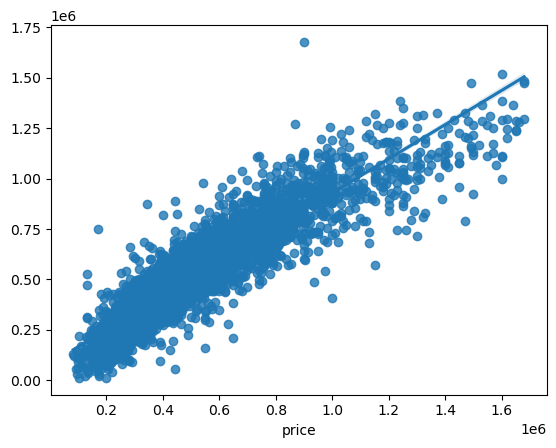

In [24]:
sns.regplot(x=y_test, y=lr.predict(X_test))

Comment: We will use some scaling tecnics to see if we can improve more the model.

In [25]:
# considering my early conclusions, let's focus on the rows where there was a donation:
df1 = df[df["price"] < 1700000]

# apply log transformation on numerical values, since it will make the 'outliers' interval smaller
# because we have a lot of zeros, and log of zero is undefined, we will add one to all values before scaling

numericals_log = df1.select_dtypes(np.number)
numericals_log["long"]= numericals_log["long"]*-1
numericals_log = numericals_log.applymap(lambda x: np.log(x+1))

<Axes: xlabel='price', ylabel='Density'>

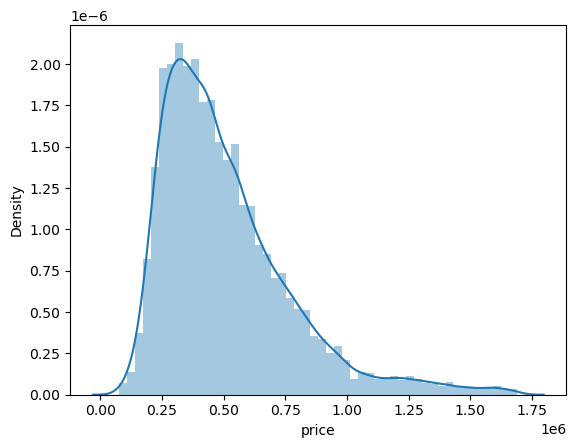

In [26]:
# before scaling:
sns.distplot(df[df['price'] < 1700000]['price'])

<Axes: xlabel='price', ylabel='Density'>

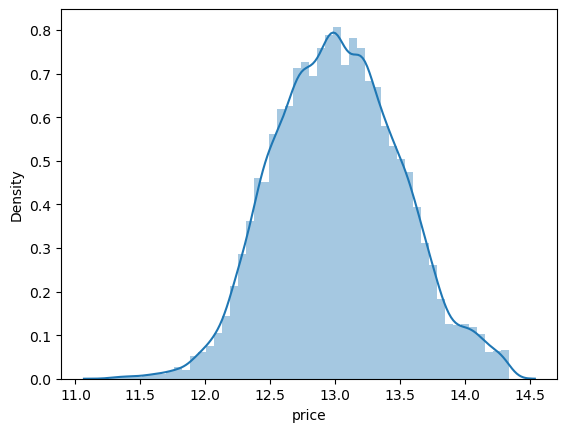

In [27]:
# after scaling:
sns.distplot(numericals_log['price'])

## Standardization/Standard Sca

In [28]:
from sklearn.preprocessing import StandardScaler
import pickle

numericals_ = df1.select_dtypes(np.number)

X = numericals_.drop(['id', 'price'], axis=1)
y = numericals_["price"]

X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

X_transformer = StandardScaler()
X_transformer.fit(X_train_num)

# saving in a pickle
with open('/Users/ben/Desktop/Ironhack Bootcamp/data_mid_bootcamp_project_regression-master/std_transformer.pickle', 'wb') as file:
    pickle.dump(X_transformer, file)

# loading from a pickle
with open('/Users/ben/Desktop/Ironhack Bootcamp/data_mid_bootcamp_project_regression-master/std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_std = loaded_transformer.transform(X_train_num)
X_test_std = loaded_transformer.transform(X_test_num)

# Normalizer

In [29]:
from sklearn.preprocessing import Normalizer

X = numericals_.drop(['id', 'price'], axis=1)
y = numericals_["price"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)


In [30]:
numericals_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21231 entries, 0 to 21596
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21231 non-null  float64
 1   bedrooms       21231 non-null  float64
 2   bathrooms      21231 non-null  float64
 3   sqft_living    21231 non-null  float64
 4   sqft_lot       21231 non-null  float64
 5   floors         21231 non-null  float64
 6   waterfront     21231 non-null  float64
 7   view           21231 non-null  float64
 8   condition      21231 non-null  float64
 9   grade          21231 non-null  float64
 10  sqft_above     21231 non-null  float64
 11  sqft_basement  21231 non-null  float64
 12  yr_built       21231 non-null  float64
 13  yr_renovated   21231 non-null  float64
 14  lat            21231 non-null  float64
 15  long           21231 non-null  float64
 16  sqft_living15  21231 non-null  float64
 17  sqft_lot15     21231 non-null  float64
 18  price 

In [31]:
# With Log scaling:

X = numericals_log.drop(['id', 'price'], axis=1)
y = numericals_log['price']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.8622050735298759
MAE: 67055.15472975808
RMSE: 100517.18298314788


In [32]:
# With StandardScaler:

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

R2: 0.8340868691601775
MAE: 75712.75465351909
RMSE: 107916.02228669554


<Axes: xlabel='price'>

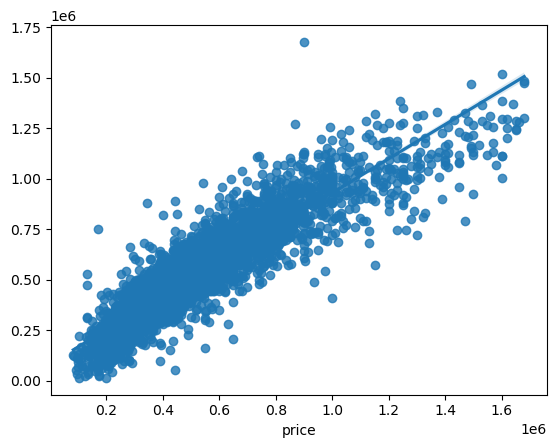

In [33]:
sns.regplot(x=y_test, y=lr.predict(X_test_std))

Comment: Is not better than the benchmark without the the outliers

In [34]:
# With Normalizer:

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
print("R2:", lr.score(X_test_norm, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_norm), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_norm), y_test, squared=False))

R2: 0.6694650657791741
MAE: 102276.12104564659
RMSE: 152319.05379346327


<Axes: xlabel='price'>

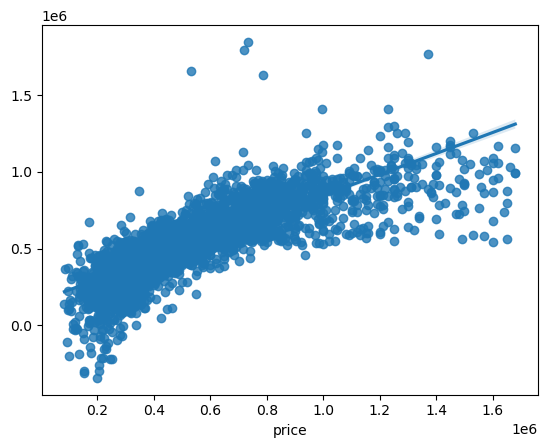

In [35]:
sns.regplot(x=y_test, y=lr.predict(X_test_norm))

# Tranning the Model

In [36]:
X = numericals_log.drop(['id', 'price'], axis=1)
y = numericals_log['price']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.8622050735298759
MAE: 67055.15472975808
RMSE: 100517.18298314788


In [37]:
predictions = lr.predict(X_test_log)

<Axes: ylabel='price'>

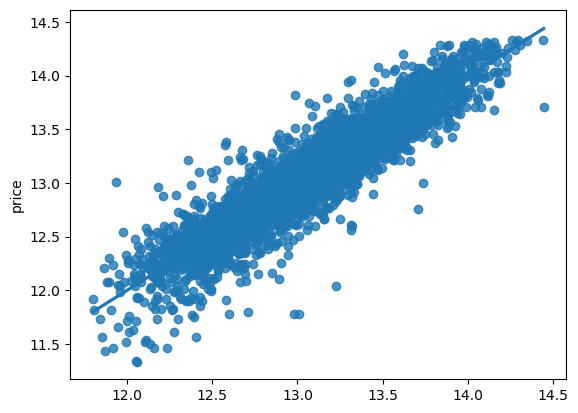

In [38]:
sns.regplot(x=predictions, y=y_test_log)

What Feasures are the best one

In [42]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train_log.columns).sort_values(ascending=False)
data_importance.tail(50)


zip_98118        1.922019e+10
zip_98024        1.922019e+10
zip_98045        1.922019e+10
zip_98065        1.922019e+10
zip_98126        1.922019e+10
zip_98027        1.922019e+10
zip_98074        1.922019e+10
zip_98053        1.922019e+10
zip_98052        1.922019e+10
zip_98075        1.922019e+10
zip_98008        1.922019e+10
zip_98007        1.922019e+10
zip_98144        1.922019e+10
zip_98136        1.922019e+10
zip_98006        1.922019e+10
zip_98029        1.922019e+10
zip_98005        1.922019e+10
zip_98033        1.922019e+10
zip_98117        1.922019e+10
zip_98116        1.922019e+10
zip_98115        1.922019e+10
zip_98103        1.922019e+10
zip_98199        1.922019e+10
zip_98107        1.922019e+10
zip_98122        1.922019e+10
zip_98040        1.922019e+10
zip_98105        1.922019e+10
zip_98119        1.922019e+10
zip_98109        1.922019e+10
zip_98102        1.922019e+10
zip_98112        1.922019e+10
zip_98004        1.922019e+10
zip_98039        1.922019e+10
long      

### We are creating a new model to see if by dropping the columns the model improves.

In [44]:
df2_feasure_importance = df1.drop(columns=['bathrooms', 'bedrooms','sqft_lot','floors','sqft_lot15','yr_renovated',
                                          'sqft_basement'])
df2_feasure_importance.head(1)

,id,sqft_living,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,1180,0,0,3,7,1180,1955,98178,47.5112,...,0,0,0,0,0,0,1,0,0,0


In [45]:
# Getting a benchmark model
X = pd.get_dummies(df2_feasure_importance.drop(['id', 'price'], axis=1))
y = df2_feasure_importance['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.8310224514013211
MAE: 76406.85308056089
RMSE: 108908.06766423665


# Correlation

In [46]:
# Checking relationship between features and target:
df1.corr()['price'].sort_values(ascending=False)[:50]

price            1.000000
grade            0.674280
sqft_living      0.668757
sqft_living15    0.597984
sqft_above       0.570525
bathrooms        0.498492
lat              0.381069
view             0.324366
bedrooms         0.313514
sqft_basement    0.282144
floors           0.277503
zip_98004        0.214534
zip_98040        0.206456
zip_98006        0.161662
zip_98112        0.150519
zip_98075        0.127356
zip_98033        0.124054
yr_renovated     0.111451
waterfront       0.111358
zip_98105        0.107151
zip_98199        0.106189
sqft_lot         0.095477
zip_98119        0.092957
zip_98005        0.091811
sqft_lot15       0.089844
zip_98074        0.088553
zip_98039        0.082864
zip_98052        0.082860
zip_98053        0.079345
zip_98109        0.077895
zip_98102        0.068520
zip_98115        0.065838
yr_built         0.060814
zip_98077        0.059069
zip_98116        0.048299
zip_98103        0.047833
long             0.046408
zip_98122        0.046023
zip_98177   

### We are creating a new model to see if by dropping the columns the model improves.

In [47]:
df3_correlation = df1.drop(columns=['zip_98006','zip_98112','zip_98075','zip_98033','yr_renovated','waterfront',
                                        'zip_98105','zip_98199','sqft_lot','zip_98119','zip_98005','sqft_lot15',
                                         'zip_98074','zip_98039','zip_98052','zip_98053','zip_98109','zip_98102',
                                        'zip_98115','yr_built','zip_98077','zip_98116','zip_98103','long','zip_98122',
                                        'zip_98177','zip_98027','zip_98029','zip_98117','condition','zip_98008',
                                        'zip_98007','zip_98072','zip_98107','zip_98144','zip_98024','zip_98136'])

In [48]:
df3_correlation

,id,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,zipcode,...,zip_98126,zip_98133,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98178,zip_98188,zip_98198
0,7129300520,3,1.00,1180,1.0,0,7,1180,0,98178,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,3,2.25,2570,2.0,0,7,2170,400,98125,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2,1.00,770,1.0,0,6,770,0,98028,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,1.0,0,7,1050,910,98136,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,3,2.00,1680,1.0,0,8,1680,0,98074,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,3.0,0,8,1530,0,98103,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,4,2.50,2310,2.0,0,8,2310,0,98146,...,0,0,1,0,0,0,0,0,0,0
21594,1523300141,2,0.75,1020,2.0,0,7,1020,0,98144,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,3,2.50,1600,2.0,0,8,1600,0,98027,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Getting a benchmark model
X = pd.get_dummies(df3_correlation.drop(['id', 'price'], axis=1))
y = df3_correlation['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.8224842765327381
MAE: 77830.05809038803
RMSE: 111625.64032762221


In [50]:
# Checking Multi-Colinearity between features:
correlations_matrix = df1.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
id,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bedrooms,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bathrooms,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sqft_living,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grade,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


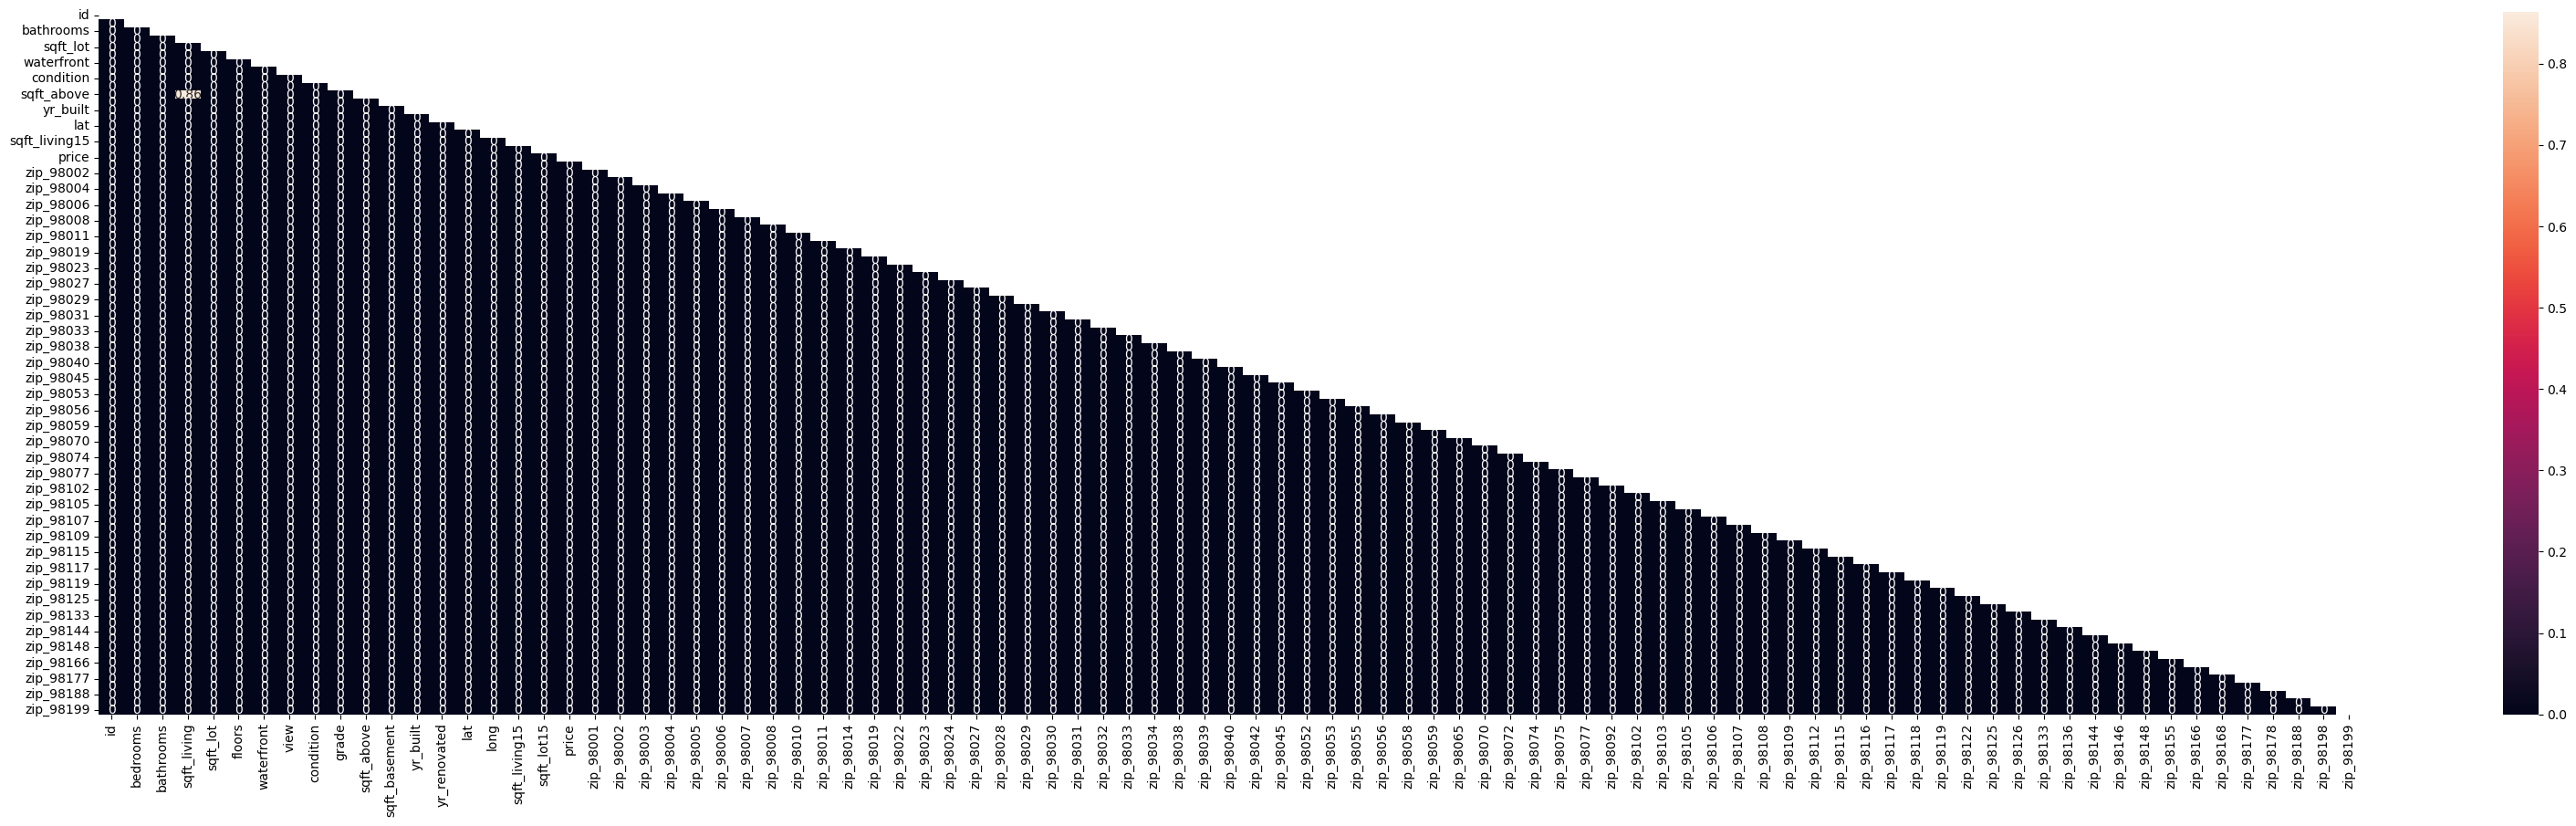

In [51]:
# Trying a heatmap to help visualize:
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(40, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

**Conclusion:** We see that base on the R2, the best model to predict the prices is **Log scaling with thouth the outliers. The R2 is 0.86 = 86%**

# 2.Understand which factors are responsible for higher property value - $650K and above.

In [52]:
df.head(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0


In [53]:
df4_value_650K = df
df4_value_650K.head(1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,3,1.0,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Getting a benchmark model 
#Filterring properties with value over 650K
properties_over_650K = df4_value_650K[df4_value_650K["price"] > 650000]
X = pd.get_dummies(df4_value_650K.drop(['id', 'price'], axis=1))
y = df4_value_650K['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.794330667594175
MAE: 97350.31143075912
RMSE: 163650.528258523


<Axes: xlabel='price'>

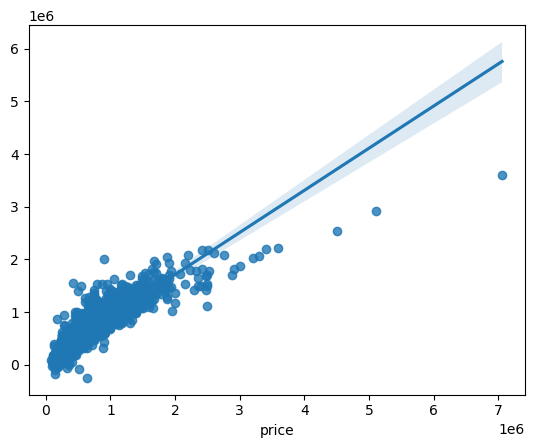

In [26]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [55]:
# R2 without the the outliers:

no_outliers = df4_value_650K[df4_value_650K["price"] < 2000000]
X = pd.get_dummies(no_outliers.drop(['id', 'price'], axis=1))
y = no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.8305199531152837
MAE: 81217.95682212016
RMSE: 119855.53340611114


<Axes: xlabel='price'>

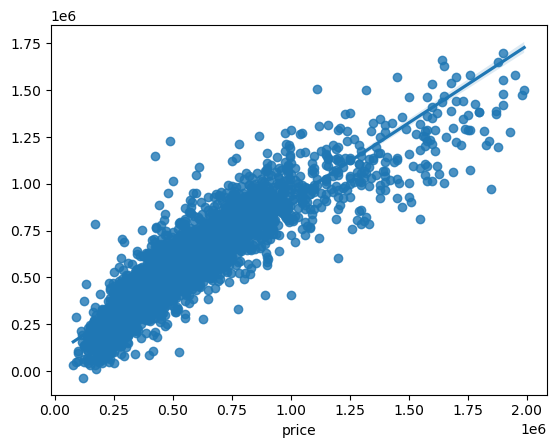

In [30]:
sns.regplot(x=y_test, y=lr.predict(X_test))

What is this for xD?

In [56]:
# considering my early conclusions, let's focus on the rows where there was a donation:
df4_value_650K_2 = df4_value_650K[df4_value_650K["price"]  > 650000]

# apply log transformation on numerical values, since it will make the 'outliers' interval smaller
# because we have a lot of zeros, and log of zero is undefined, we will add one to all values before scaling

numericals_log = df4_value_650K_2.select_dtypes(np.number)
numericals_log["long"]= numericals_log["long"]*-1
numericals_log = numericals_log.applymap(lambda x: np.log(x+1))

<Axes: xlabel='price', ylabel='Density'>

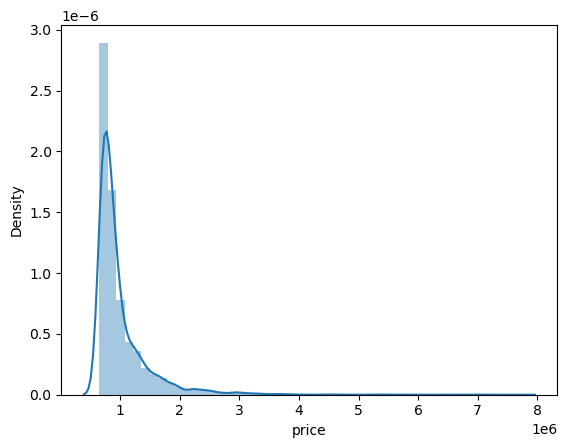

In [57]:
# before scaling:
sns.distplot(df4_value_650K[df4_value_650K['price'] > 650000]['price'])

<Axes: xlabel='price', ylabel='Density'>

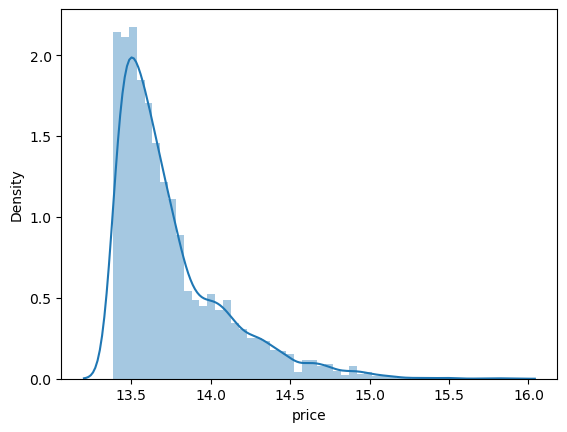

In [58]:
# after scaling:
sns.distplot(numericals_log['price'])

## Standardization/Standard Sca

In [59]:
from sklearn.preprocessing import StandardScaler
import pickle

numericals_ = df4_value_650K_2.select_dtypes(np.number)

X = numericals_.drop(['id', 'price'], axis=1)
y = numericals_["price"]

X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

X_transformer = StandardScaler()
X_transformer.fit(X_train_num)

# saving in a pickle
with open('/Users/ben/Desktop/Ironhack Bootcamp/data_mid_bootcamp_project_regression-master/pickel_2/std_transformer.pickle', 'wb') as file:
    pickle.dump(X_transformer, file)

# loading from a pickle
with open('/Users/ben/Desktop/Ironhack Bootcamp/data_mid_bootcamp_project_regression-master/pickel_2/std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_std = loaded_transformer.transform(X_train_num)
X_test_std = loaded_transformer.transform(X_test_num)



# Normalizer

In [60]:
from sklearn.preprocessing import Normalizer

X = numericals_.drop(['id', 'price'], axis=1)
y = numericals_["price"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)


In [61]:
numericals_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5205 entries, 5 to 21590
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5205 non-null   float64
 1   bedrooms       5205 non-null   float64
 2   bathrooms      5205 non-null   float64
 3   sqft_living    5205 non-null   float64
 4   sqft_lot       5205 non-null   float64
 5   floors         5205 non-null   float64
 6   waterfront     5205 non-null   float64
 7   view           5205 non-null   float64
 8   condition      5205 non-null   float64
 9   grade          5205 non-null   float64
 10  sqft_above     5205 non-null   float64
 11  sqft_basement  5205 non-null   float64
 12  yr_built       5205 non-null   float64
 13  yr_renovated   5205 non-null   float64
 14  lat            5205 non-null   float64
 15  long           5205 non-null   float64
 16  sqft_living15  5205 non-null   float64
 17  sqft_lot15     5205 non-null   float64
 18  price  

In [62]:
# With Log scaling:

X = numericals_log.drop(['id', 'price'], axis=1)
y = numericals_log['price']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.7511283024497792
MAE: 138388.13169372483
RMSE: 222474.43610728421


In [63]:
# With StandardScaler:

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

R2: 0.7137476901720642
MAE: 168500.70659680336
RMSE: 244023.7562129766


<Axes: xlabel='price'>

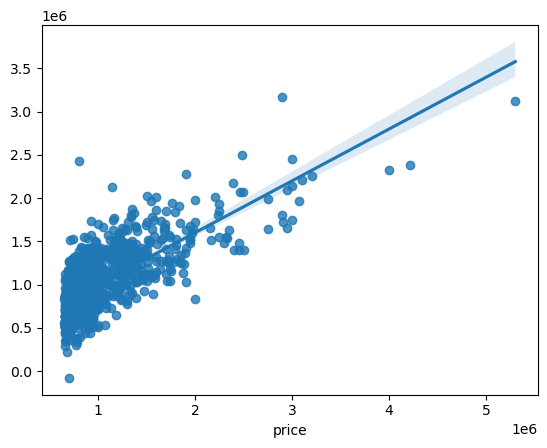

In [44]:
sns.regplot(x=y_test, y=lr.predict(X_test_std))

Comment: Is not better than the benchmark without the the outliers

In [64]:
# With Normalizer:

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
print("R2:", lr.score(X_test_norm, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_norm), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_norm), y_test, squared=False))

R2: 0.5026493669955704
MAE: 210989.1824982105
RMSE: 321653.9918137184


<Axes: xlabel='price'>

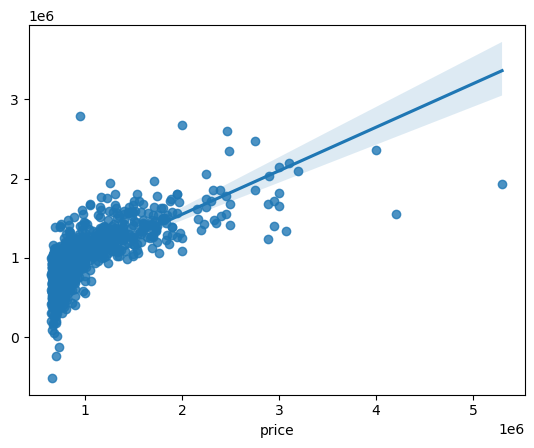

In [65]:
sns.regplot(x=y_test, y=lr.predict(X_test_norm))

# Tranning the Model

In [66]:
X = numericals_log.drop(['id', 'price'], axis=1)
y = numericals_log['price']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.7511283024497792
MAE: 138388.13169372483
RMSE: 222474.43610728421


In [67]:
predictions = lr.predict(X_test_log)

## What Feasures are the best one

Grade is the best feature.